# Model Interpretability
-----------------------------------




![picture](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/10/82241time_series.jpg)

In [ ]:
#https://drive.google.com/file/d/1CppeqGbiBzX61jx56gcXyGGDNEeLlJ-W/view?usp=share_link
!gdown 1CppeqGbiBzX61jx56gcXyGGDNEeLlJ-W

Downloading...
From: https://drive.google.com/uc?id=1CppeqGbiBzX61jx56gcXyGGDNEeLlJ-W
To: /content/train_loan_imbalanced.csv
100% 38.0k/38.0k [00:00<00:00, 50.4MB/s]


In [ ]:
import pandas as pd
df = pd.read_csv('/content/train_loan_imbalanced.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
!pip install pulp
!pip install pycebox
from pycebox.ice import ice, ice_plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import modules we need for EDA and wrangling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# these functions are useful for splitting and normalization
from sklearn.preprocessing import  MinMaxScaler
from sklearn.model_selection import train_test_split

# import other functions we'll need for regression modeling
from sklearn.linear_model import LinearRegression # LR
from sklearn.tree import DecisionTreeRegressor # DTR
from sklearn.ensemble import RandomForestRegressor # RFR
from sklearn.ensemble import GradientBoostingRegressor #GBR

# regression error metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
print("This is the shape :\n", df.shape, '\n')
print("These are the column names: \n", df.columns, '\n')
print("These are the data types: \n", df.dtypes)

print("\nThis is the head:")
df.head()

This is the shape :
 (614, 13) 

These are the column names: 
 Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object') 

These are the data types: 
 Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

This is the head:


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
#Dropping Loan ID as this column cannot be converted
df.drop('Loan_ID', inplace=True, axis=1)
df.head()
df.shape

(614, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [ ]:
df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df=df.dropna()
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    object 
 1   Married            480 non-null    object 
 2   Dependents         480 non-null    object 
 3   Education          480 non-null    object 
 4   Self_Employed      480 non-null    object 
 5   ApplicantIncome    480 non-null    int64  
 6   CoapplicantIncome  480 non-null    float64
 7   LoanAmount         480 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     480 non-null    float64
 10  Property_Area      480 non-null    object 
 11  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 48.8+ KB


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [ ]:
#Using label encoder change values to float and int
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Married'] = label_encoder.fit_transform(df['Married'])
df['Dependents'] = label_encoder.fit_transform(df['Dependents'])
df['Self_Employed'] = label_encoder.fit_transform(df['Self_Employed'])
df['Property_Area'] = label_encoder.fit_transform(df['Property_Area'])
df['Education'] = label_encoder.fit_transform(df['Education'])
df['Loan_Status'] = label_encoder.fit_transform(df['Loan_Status'])

In [ ]:
Counter(df['Loan_Status'])

Counter({0: 148, 1: 332})

In [ ]:
# everything else is X , target variable Loan_Status
X = df.drop('Loan_Status', axis=1)
print(X.shape)

(480, 11)


In [ ]:
# Y is the target variable
Y= df['Loan_Status']

In [ ]:
# Split the data set using 80/20split

X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size = 0.2,
                                                    shuffle = True,
                                                    random_state = 42)

In [ ]:
# Check for the shape after splitting
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(384, 11) (96, 11) (384,) (96,)


In [ ]:
# Balance the data using SMOTE
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SVMSMOTE
oversample= SVMSMOTE()
X_res, y_res =oversample.fit_resample(X_train,y_train)
counter= Counter(y_res)
print(counter)

Counter({0: 264, 1: 264})


In [ ]:
# convert these all to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
# Perform Transformation using MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Check for training data value all values to be in range between 0 and 1
tmp = pd.DataFrame(X_train)
tmp.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000
mean,0.817708,0.632812,0.252604,0.197917,0.153646,0.065078,0.048334,0.227792,0.687289,0.846354,0.518229
std,0.386588,0.482667,0.336571,0.398949,0.361079,0.075379,0.082026,0.131002,0.151586,0.361079,0.390395
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.033080,0.000000,0.155245,0.729730,1.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.045813,0.036631,0.202200,0.729730,1.000000,0.500000
75%,1.000000,1.000000,0.416667,0.000000,0.000000,0.070167,0.066591,0.269036,0.729730,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:

LR = LinearRegression()

LR = LR.fit(X_train, y_train)

In [ ]:

train_preds_LR = LR.predict(X_train)
test_preds_LR = LR.predict(X_test)

In [ ]:

DTR = DecisionTreeRegressor()


DTR = DTR.fit(X_train, y_train)

In [ ]:

train_preds_DTR = DTR.predict(X_train)
test_preds_DTR = DTR.predict(X_test)

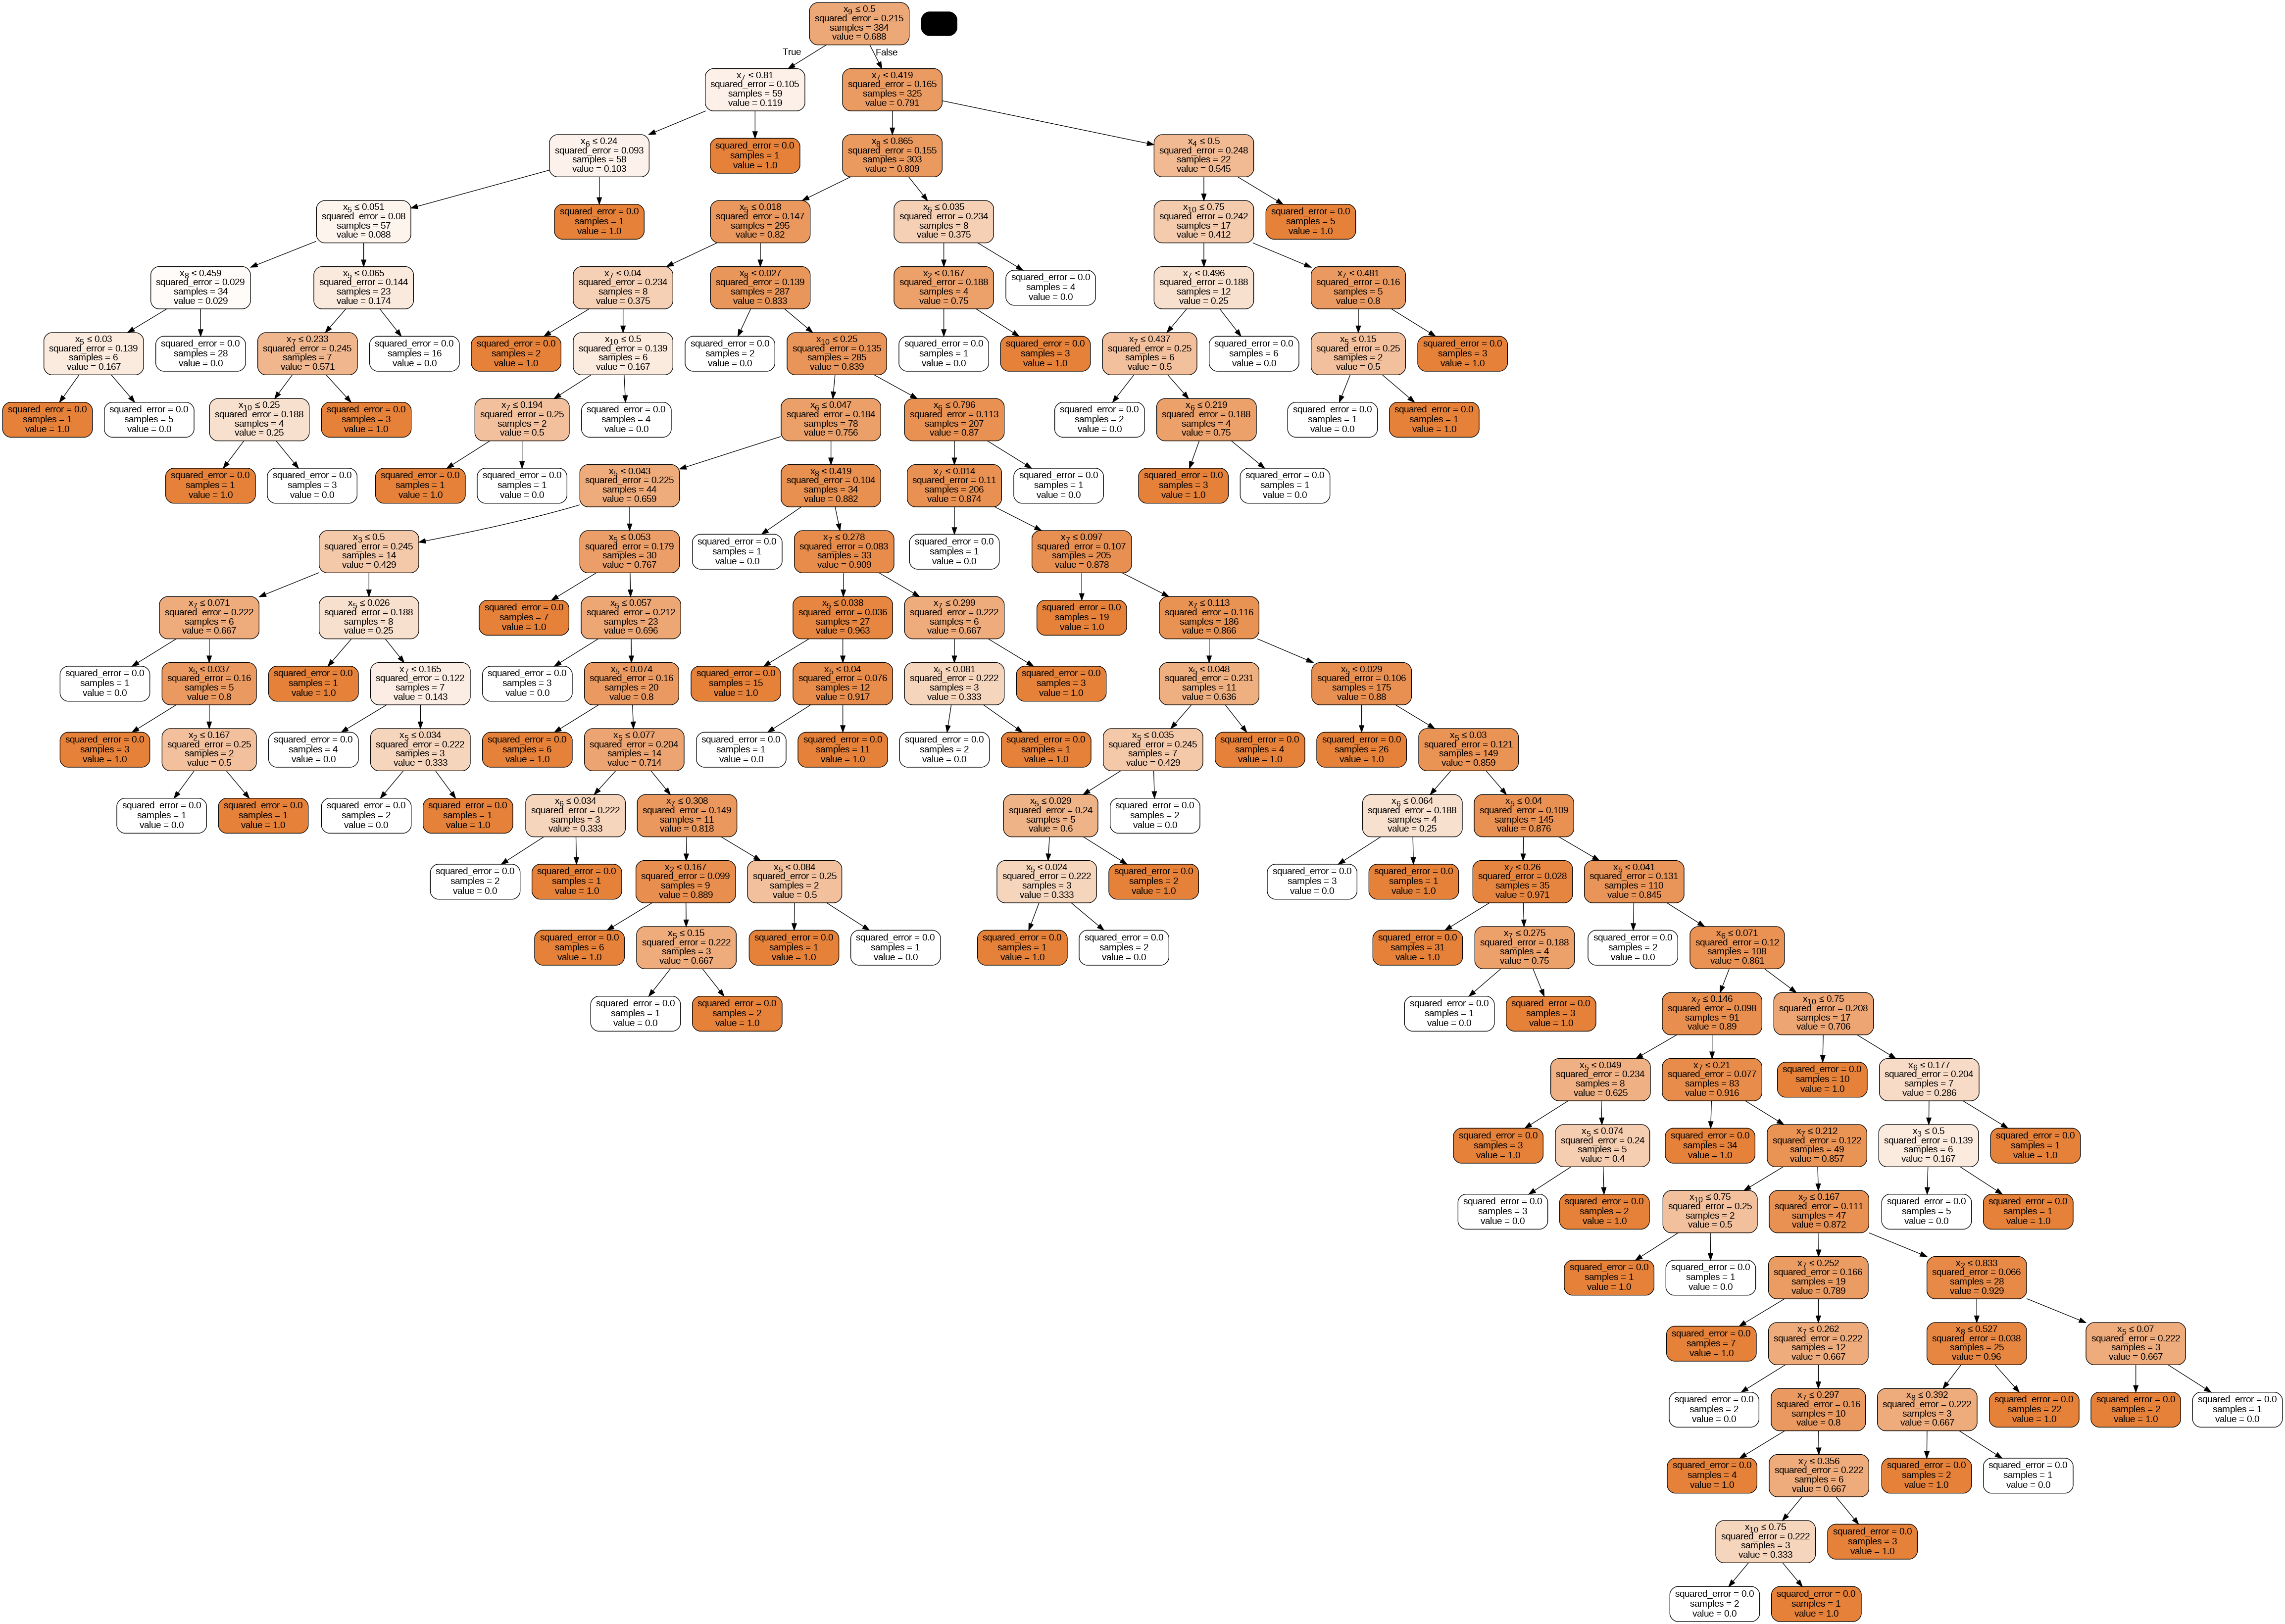

In [ ]:
from sklearn.tree import export_graphviz

from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(DTR, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [ ]:
RFR = GradientBoostingRegressor()

RFR = RFR.fit(X_train, y_train)

In [ ]:
train_preds_RFR = RFR.predict(X_train)
test_preds_RFR = RFR.predict(X_test)

In [ ]:

print("This is train R2 (LR):", r2_score(y_train, train_preds_LR)) # train
print("This is test R2 (LR):", r2_score(y_test, test_preds_LR)) # test

# 1) R2 value - for Decision Tree Regression
print("This is train R2 (DTR):", r2_score(y_train, train_preds_DTR)) # train
print("This is test R2 (DTR):", r2_score(y_test, test_preds_DTR)) # test

# 1) R2 value - for Random Forest Regression
print("This is train R2 (RFR):", r2_score(y_train, train_preds_RFR)) # train
print("This is test R2 (RFR):", r2_score(y_test, test_preds_RFR)) # test

This is train R2 (LR): 0.29324354234352745
This is test R2 (LR): 0.3247340119945218
This is train R2 (DTR): 1.0
This is test R2 (DTR): -0.4117647058823528
This is train R2 (RFR): 0.6776418453335924
This is test R2 (RFR): 0.18345620974274623


In [ ]:
# 2) mae - for Linear Regression
trainMAE_LR = mean_absolute_error(y_train, train_preds_LR)
print("This is trainMAE (LR):", trainMAE_LR) # train
testMAE_LR = mean_absolute_error(y_test, test_preds_LR)
print("This is testMAE (LR):", testMAE_LR) # test

# 2) mae - for DT Regression
trainMAE_DTR = mean_absolute_error(y_train, train_preds_DTR)
print("This is trainMAE (DTR):", trainMAE_DTR) # train
testMAE_DTR = mean_absolute_error(y_test, test_preds_DTR)
print("This is testMAE (DTR):", testMAE_DTR) # test

# 2) mae - for RF Regression
trainMAE_RFR = mean_absolute_error(y_train, train_preds_RFR)
print("This is trainMAE (RFR):", trainMAE_RFR) # train
testMAE_RFR = mean_absolute_error(y_test, test_preds_RFR)
print("This is testMAE (RFR):", testMAE_RFR) # test

This is trainMAE (LR): 0.30368441539926555
This is testMAE (LR): 0.2910366512740151
This is trainMAE (DTR): 0.0
This is testMAE (DTR): 0.2916666666666667
This is trainMAE (RFR): 0.19064187978642375
This is testMAE (RFR): 0.30842394853278343


In [ ]:
# 3) mse
trainMSE_LR = mean_squared_error(y_train, train_preds_LR)
print("This is trainMSE (LR):", trainMSE_LR)
testMSE_LR = mean_squared_error(y_test, test_preds_LR)
print("This is testMSE (LR):", testMSE_LR)

# 3) mse
trainMSE_DTR = mean_squared_error(y_train, train_preds_DTR)
print("This is trainMSE (DTR):", trainMSE_DTR)
testMSE_DTR = mean_squared_error(y_test, test_preds_DTR)
print("This is testMSE (DTR):", testMSE_DTR)

# 3) mse
trainMSE_RFR = mean_squared_error(y_train, train_preds_RFR)
print("This is trainMSE (RFR):", trainMSE_RFR)
testMSE_RFR = mean_squared_error(y_test, test_preds_RFR)
print("This is testMSE (RFR):", testMSE_RFR)

This is trainMSE (LR): 0.15184220769963278
This is testMSE (LR): 0.13950807738307625
This is trainMSE (DTR): 0.0
This is testMSE (DTR): 0.2916666666666667
This is trainMSE (RFR): 0.06925663479161101
This is testMSE (RFR): 0.1686956788899535


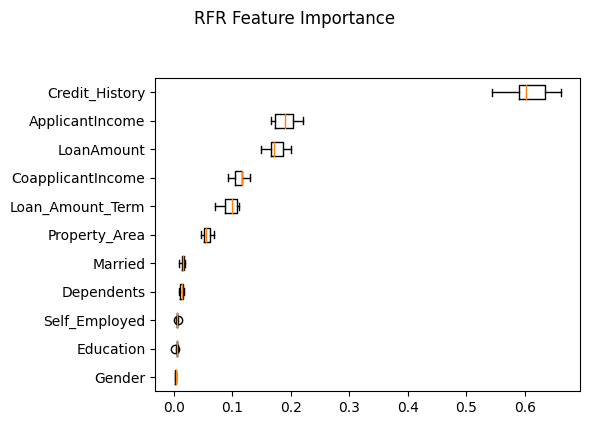

In [ ]:
from sklearn.inspection import permutation_importance

clf = RFR

result = permutation_importance(clf, X_train, y_train, n_repeats=10,
                                random_state=42)
perm_sorted_idx = result.importances_mean.argsort()

tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5

fig, ax1 = plt.subplots(1, 1, figsize=(6, 4))
ax1.boxplot(result.importances[perm_sorted_idx].T, vert=False,
            labels=X.columns[perm_sorted_idx])
fig.suptitle('RFR Feature Importance', y=1.05)
fig.tight_layout()
plt.show()

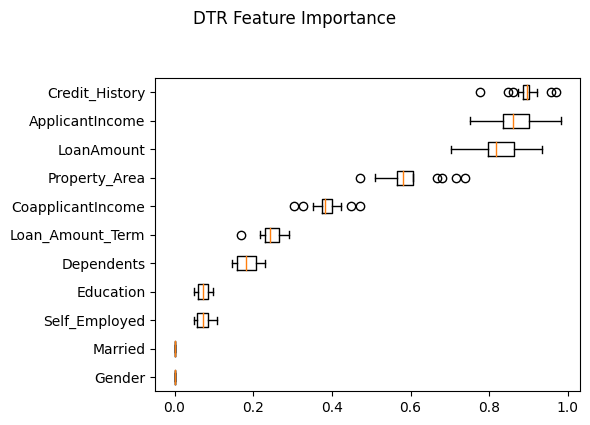

In [ ]:
from sklearn.inspection import permutation_importance



clf = DTR

result = permutation_importance(clf, X_train, y_train, n_repeats=20,
                                random_state=42)
perm_sorted_idx = result.importances_mean.argsort()

fig, ax1 = plt.subplots(1, 1, figsize=(6, 4))
ax1.boxplot(result.importances[perm_sorted_idx].T, vert=False,
            labels=X.columns[perm_sorted_idx])
fig.suptitle('DTR Feature Importance', y=1.05)
fig.tight_layout()
plt.show()

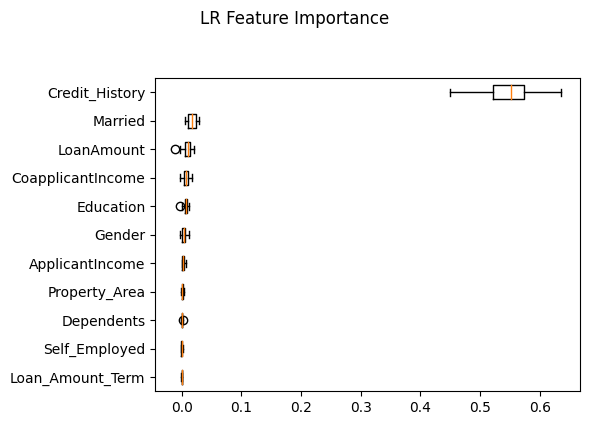

In [ ]:


from sklearn.inspection import permutation_importance



clf = LR

result = permutation_importance(clf, X_train, y_train, n_repeats=20,
                                random_state=42)
perm_sorted_idx = result.importances_mean.argsort()

fig, ax1 = plt.subplots(1, 1, figsize=(6, 4))
ax1.boxplot(result.importances[perm_sorted_idx].T, vert=False,
            labels=X.columns[perm_sorted_idx])
fig.suptitle('LR Feature Importance', y=1.05) # don't forget to update title!
fig.tight_layout()
plt.show()

## **Feature Importance Comparision of different Models**

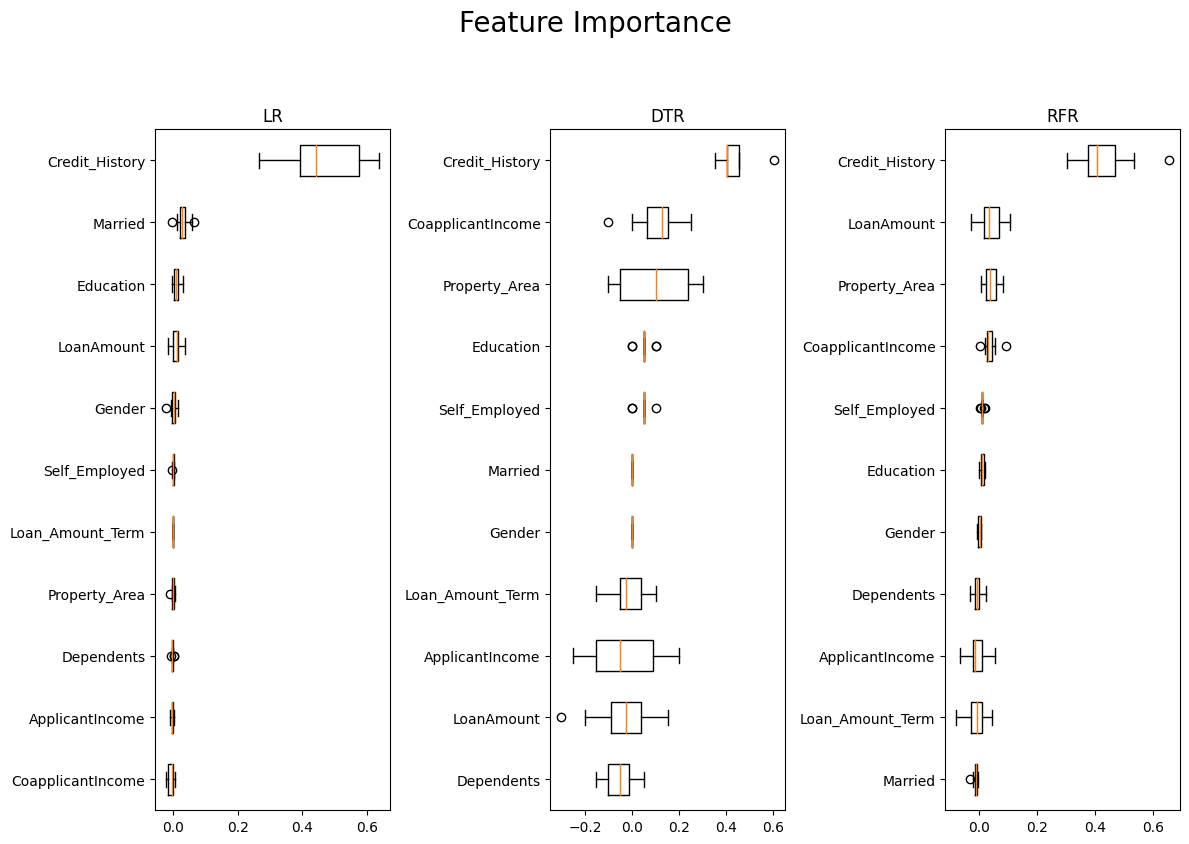

In [ ]:

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 8))
plt.suptitle('Feature Importance', y= 1.05, size = 20)
# LR
clf = LR
result = permutation_importance(clf, X_test, y_test, n_repeats=20,
                                random_state=42)
perm_sorted_idx = result.importances_mean.argsort()
ax1.boxplot(result.importances[perm_sorted_idx].T, vert=False,
            labels=X.columns[perm_sorted_idx])
ax1.set_title('LR')


clf = DTR
result = permutation_importance(clf, X_test, y_test, n_repeats=10,
                                random_state=42)
perm_sorted_idx = result.importances_mean.argsort()

ax2.boxplot(result.importances[perm_sorted_idx].T, vert=False,
            labels=X.columns[perm_sorted_idx])
ax2.set_title('DTR')

# RFR
clf = RFR
result = permutation_importance(clf, X_test, y_test, n_repeats=10,
                                random_state=42)
perm_sorted_idx = result.importances_mean.argsort()

ax3.boxplot(result.importances[perm_sorted_idx].T, vert=False,
            labels=X.columns[perm_sorted_idx])
ax3.set_title('RFR')

fig.tight_layout()
plt.show()

## **ICE & PDP PLOTS**

### **BASED ON RFR**

In [ ]:
train_X_df = pd.DataFrame(X_train, columns=X.columns)
train_X_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,1.0,1.000000,1.0,0.0,0.041707,0.000000,0.121827,0.324324,1.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.049153,0.000000,0.179357,0.729730,1.0,0.5
2,1.0,1.0,0.666667,1.0,0.0,0.047458,0.041700,0.250423,0.729730,1.0,0.0
3,1.0,1.0,0.666667,0.0,0.0,0.031639,0.034489,0.148900,0.729730,1.0,0.5
4,1.0,1.0,1.000000,0.0,0.0,0.093878,0.000000,0.201354,0.324324,1.0,1.0


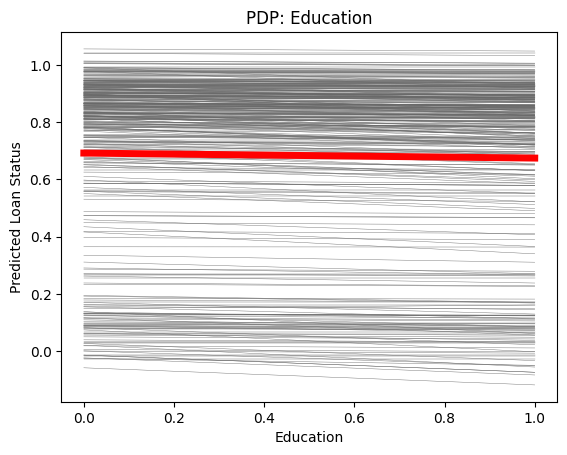

In [ ]:
tmpdf = ice(data=train_X_df, column='Education',
                   predict=RFR.predict,
            num_grid_points=20)

ice_plot(tmpdf, c='dimgray', linewidth=0.3,
                  plot_pdp=True,
         pdp_kwargs={'linewidth': 5, 'color':'red'})
plt.title('PDP: Education')
plt.ylabel('Predicted Loan Status')
plt.xlabel('Education');
plt.show()

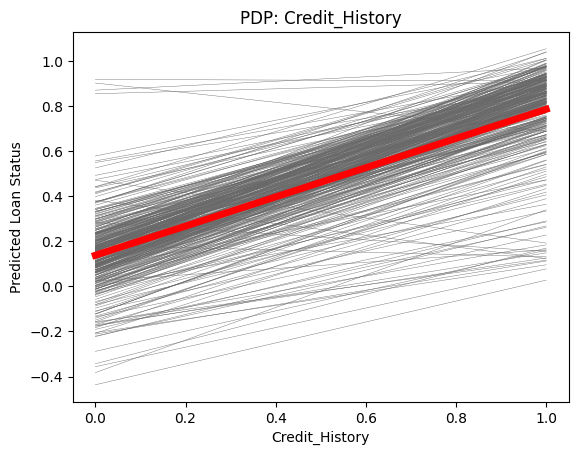

In [ ]:
tmpdf = ice(data=train_X_df, column='Credit_History',
                   predict=RFR.predict,
            num_grid_points=20)

ice_plot(tmpdf, c='dimgray', linewidth=0.3,
                  plot_pdp=True,
         pdp_kwargs={'linewidth': 5, 'color':'red'})
plt.title('PDP: Credit_History')
plt.ylabel('Predicted Loan Status')
plt.xlabel('Credit_History');
plt.show()

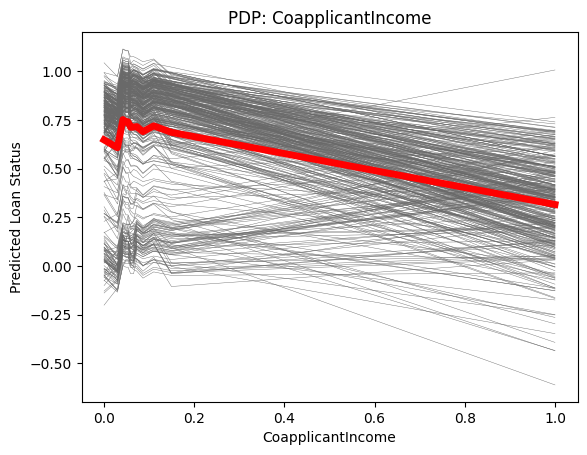

In [ ]:
tmpdf = ice(data=train_X_df, column='CoapplicantIncome',
                   predict=RFR.predict,
            num_grid_points=20)

ice_plot(tmpdf, c='dimgray', linewidth=0.3,
                  plot_pdp=True,
         pdp_kwargs={'linewidth': 5, 'color':'red'})
plt.title('PDP: CoapplicantIncome')
plt.ylabel('Predicted Loan Status')
plt.xlabel('CoapplicantIncome');
plt.show()

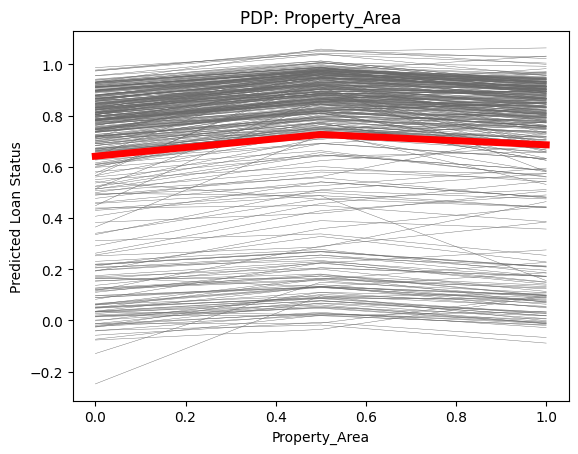

In [ ]:
tmpdf = ice(data=train_X_df, column='Property_Area',
                   predict=RFR.predict,
            num_grid_points=20)

ice_plot(tmpdf, c='dimgray', linewidth=0.3,
                  plot_pdp=True,
         pdp_kwargs={'linewidth': 5, 'color':'red'})
plt.title('PDP: Property_Area')
plt.ylabel('Predicted Loan Status')
plt.xlabel('Property_Area');
plt.show()

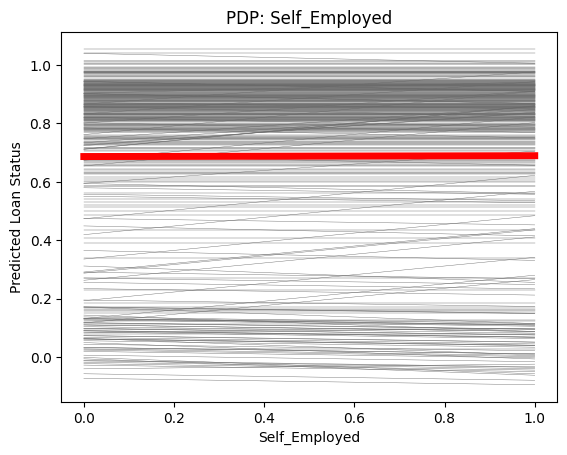

In [ ]:
tmpdf = ice(data=train_X_df, column='Self_Employed',
                   predict=RFR.predict,
            num_grid_points=20)

ice_plot(tmpdf, c='dimgray', linewidth=0.3,
                  plot_pdp=True,
         pdp_kwargs={'linewidth': 5, 'color':'red'})
plt.title('PDP: Self_Employed')
plt.ylabel('Predicted Loan Status')
plt.xlabel('Self_Employed');
plt.show()

### **BASED ON DTR**

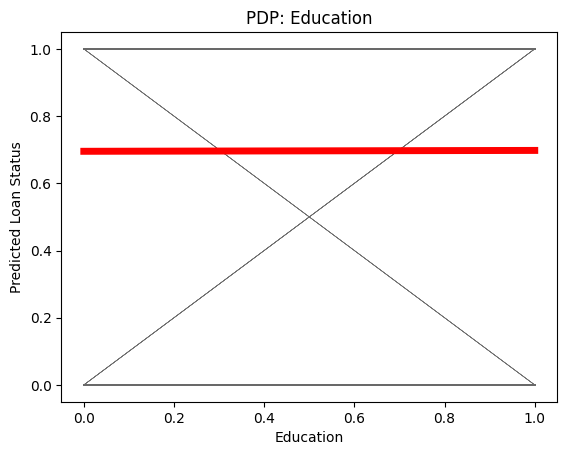

In [ ]:
tmpdf = ice(data=train_X_df, column='Education',
                   predict=DTR.predict,
            num_grid_points=20)

ice_plot(tmpdf, c='dimgray', linewidth=0.3,
                  plot_pdp=True,
         pdp_kwargs={'linewidth': 5, 'color':'red'})
plt.title('PDP: Education')
plt.ylabel('Predicted Loan Status')
plt.xlabel('Education');
plt.show()

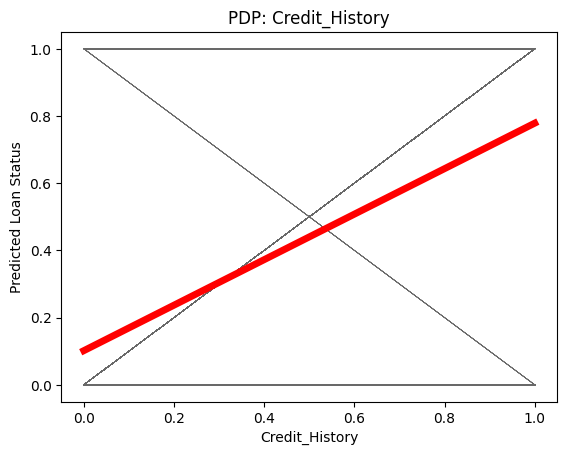

In [ ]:
tmpdf = ice(data=train_X_df, column='Credit_History',
                   predict=DTR.predict,
            num_grid_points=20)

ice_plot(tmpdf, c='dimgray', linewidth=0.3,
                  plot_pdp=True,
         pdp_kwargs={'linewidth': 5, 'color':'red'})
plt.title('PDP: Credit_History')
plt.ylabel('Predicted Loan Status')
plt.xlabel('Credit_History');
plt.show()

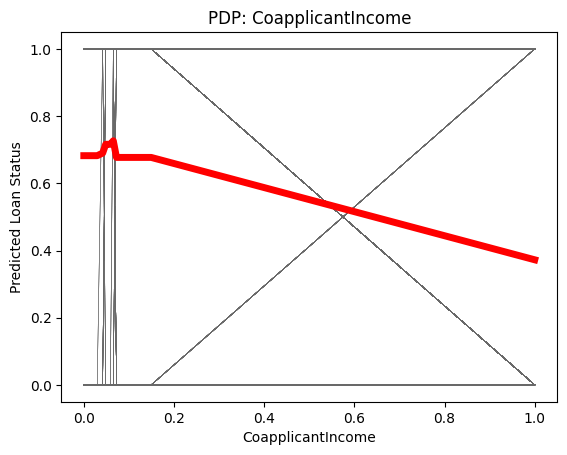

In [ ]:
tmpdf = ice(data=train_X_df, column='CoapplicantIncome',
                   predict=DTR.predict,
            num_grid_points=20)

ice_plot(tmpdf, c='dimgray', linewidth=0.3,
                  plot_pdp=True,
         pdp_kwargs={'linewidth': 5, 'color':'red'})
plt.title('PDP: CoapplicantIncome')
plt.ylabel('Predicted Loan Status')
plt.xlabel('CoapplicantIncome');
plt.show()

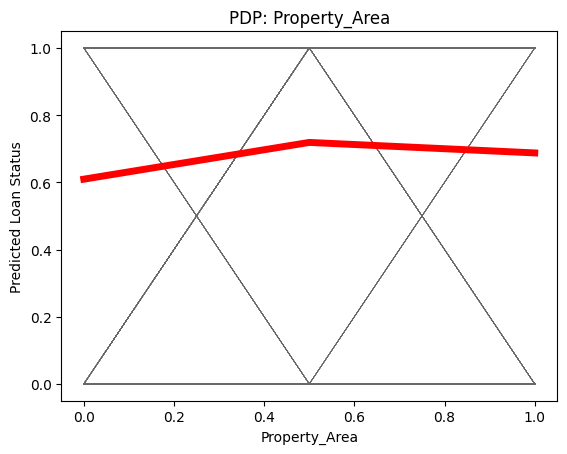

In [ ]:
tmpdf = ice(data=train_X_df, column='Property_Area',
                   predict=DTR.predict,
            num_grid_points=20)

ice_plot(tmpdf, c='dimgray', linewidth=0.3,
                  plot_pdp=True,
         pdp_kwargs={'linewidth': 5, 'color':'red'})
plt.title('PDP: Property_Area')
plt.ylabel('Predicted Loan Status')
plt.xlabel('Property_Area');
plt.show()

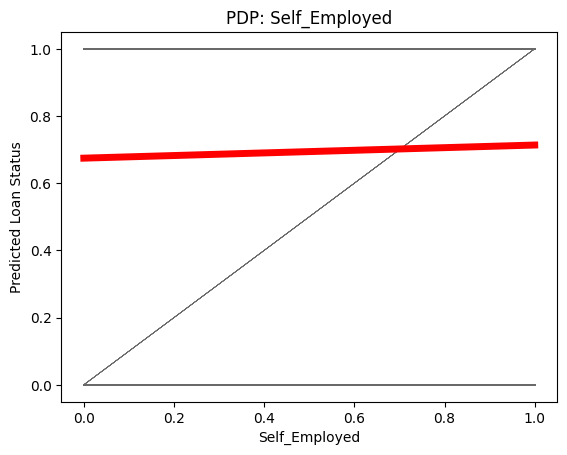

In [ ]:
tmpdf = ice(data=train_X_df, column='Self_Employed',
                   predict=DTR.predict,
            num_grid_points=20)

ice_plot(tmpdf, c='dimgray', linewidth=0.3,
                  plot_pdp=True,
         pdp_kwargs={'linewidth': 5, 'color':'red'})
plt.title('PDP: Self_Employed')
plt.ylabel('Predicted Loan Status')
plt.xlabel('Self_Employed');
plt.show()

### **BASED ON LR**

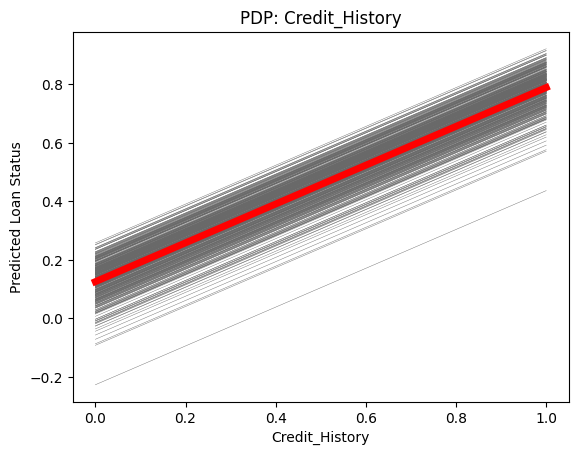

In [ ]:
tmpdf = ice(data=train_X_df, column='Credit_History',
                   predict=LR.predict,
            num_grid_points=20)

ice_plot(tmpdf, c='dimgray', linewidth=0.3,
                  plot_pdp=True,
         pdp_kwargs={'linewidth': 5, 'color':'red'})
plt.title('PDP: Credit_History')
plt.ylabel('Predicted Loan Status')
plt.xlabel('Credit_History');
plt.show()

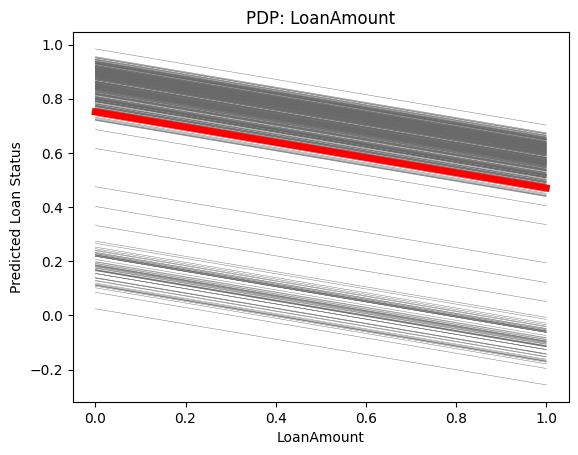

In [ ]:
tmpdf = ice(data=train_X_df, column='LoanAmount',
                   predict=LR.predict,
            num_grid_points=20)

ice_plot(tmpdf, c='dimgray', linewidth=0.3,
                  plot_pdp=True,
         pdp_kwargs={'linewidth': 5, 'color':'red'})
plt.title('PDP: LoanAmount')
plt.ylabel('Predicted Loan Status')
plt.xlabel('LoanAmount');
plt.show()

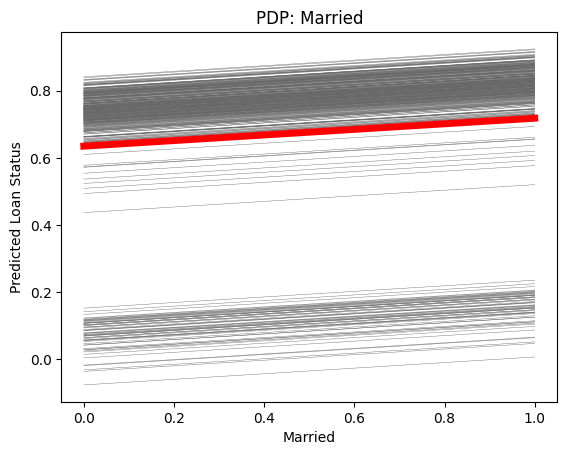

In [ ]:
tmpdf = ice(data=train_X_df, column='Married',
                   predict=LR.predict,
            num_grid_points=20)

ice_plot(tmpdf, c='dimgray', linewidth=0.3,
                  plot_pdp=True,
         pdp_kwargs={'linewidth': 5, 'color':'red'})
plt.title('PDP: Married')
plt.ylabel('Predicted Loan Status')
plt.xlabel('Married');
plt.show()

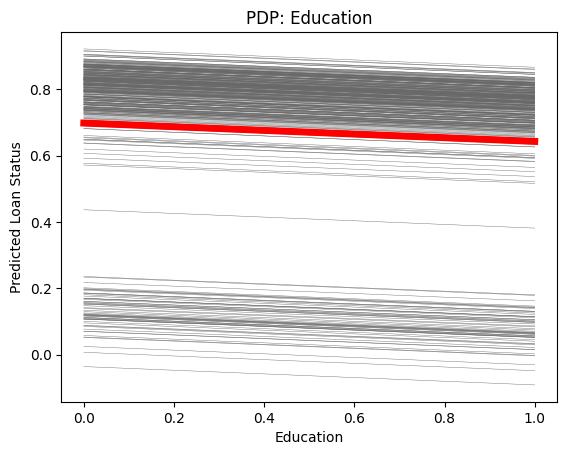

In [ ]:
tmpdf = ice(data=train_X_df, column='Education',
                   predict=LR.predict,
            num_grid_points=20)

ice_plot(tmpdf, c='dimgray', linewidth=0.3,
                  plot_pdp=True,
         pdp_kwargs={'linewidth': 5, 'color':'red'})
plt.title('PDP: Education')
plt.ylabel('Predicted Loan Status')
plt.xlabel('Education');
plt.show()

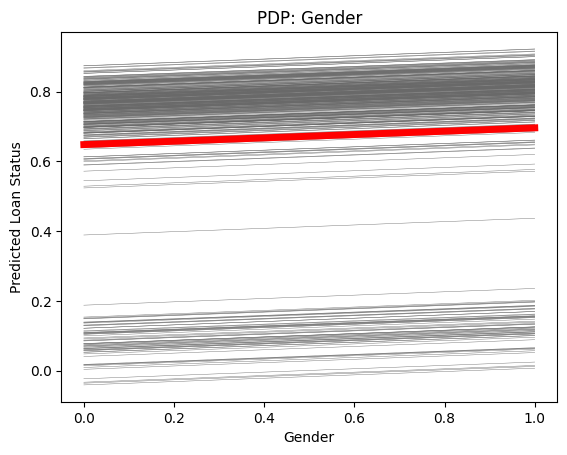

In [ ]:
tmpdf = ice(data=train_X_df, column='Gender',
                   predict=LR.predict,
            num_grid_points=20)

ice_plot(tmpdf, c='dimgray', linewidth=0.3,
                  plot_pdp=True,
         pdp_kwargs={'linewidth': 5, 'color':'red'})
plt.title('PDP: Gender')
plt.ylabel('Predicted Loan Status')
plt.xlabel('Gender');
plt.show()

# Conclusion: Interpretation


Here In this assignment I have performed all three models which are LR, RFR and DTR.

For **LR** : The Top features are Credit_History, Married, Education, Gender, and Loan Amount.

Loan Status is increasing as the features Credit History, Gender, married increases, and decreases as Loan amount and Education decreases.



For **RFR** : The Top features are Credit_History, Education, Coapplicant Income, Property area, and Self employed.

Loan Status is increasing as the feature Credit History increases.
And decreases when Coapplicant increase, AS Propert increases Loan status increased for a while and declined and remains stable when Education increased.


For **DTR** : The top features are Education, Credit_History, CoApplicant Income, property Area, Self Employed.

Loan Status increases when Credit History Increases.
It decreases when Co applicant Income decreases.
Loan Status incresed for a while and declined after when property area increased.
And the Loan Status remains Stable when Education increases.